In [126]:
import pandas as pd

columns = ['ID', 'Game', 'Sentiment', 'Tweet']

df = pd.read_csv('twitter_training.csv', names = columns)

df.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [127]:
df.dtypes

ID            int64
Game         object
Sentiment    object
Tweet        object
dtype: object

In [128]:
df.isna().sum()

ID             0
Game           0
Sentiment      0
Tweet        686
dtype: int64

In [129]:
df.dropna(inplace=True)

In [130]:
df.isna().sum()

ID           0
Game         0
Sentiment    0
Tweet        0
dtype: int64

In [131]:
df['Tweet'] = df['Tweet'].astype(str)
df['Sentiment'] = df['Sentiment'].astype(str)

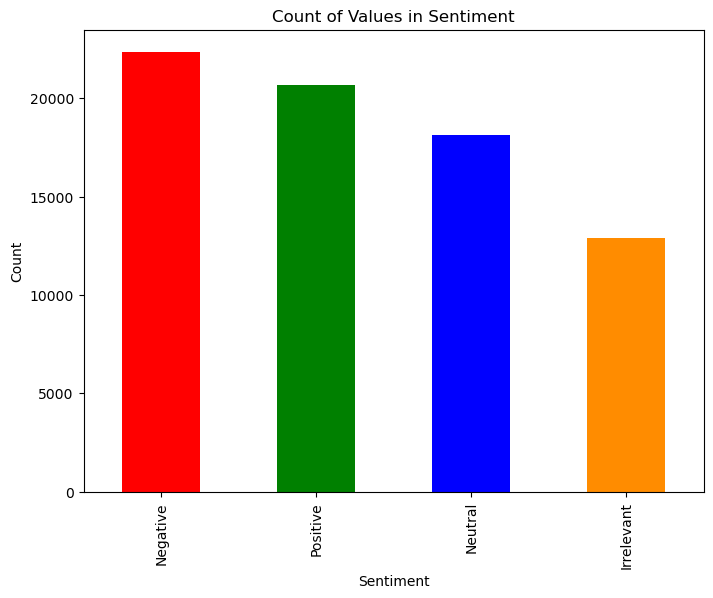

In [132]:
import matplotlib.pyplot as plt

value_counts = df['Sentiment'].value_counts()

colors = ['red', 'green', 'blue', 'darkorange']

# Plotting the count of values
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Values in Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [133]:
# get a word count per of text
def count_words(words):
    return len(words.split())

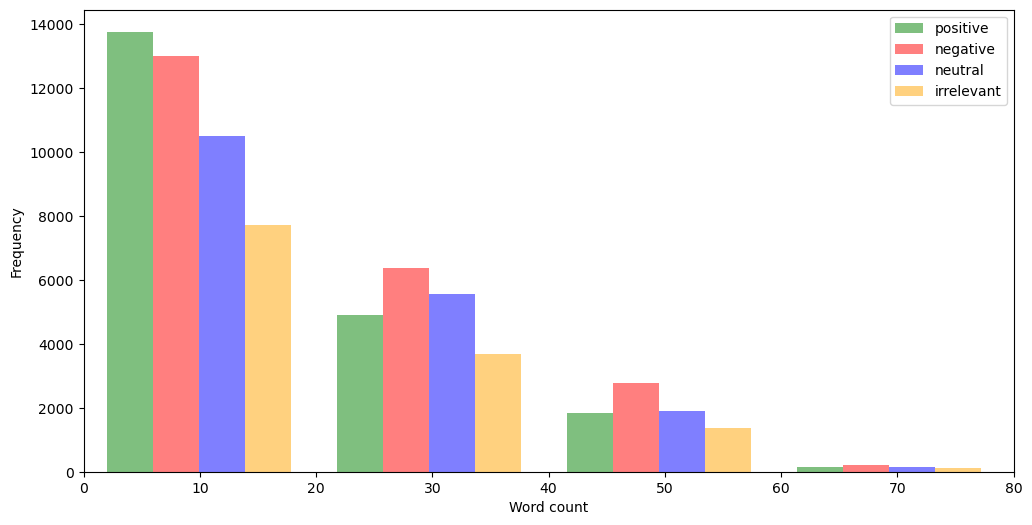

In [134]:
df['word count'] = df['Tweet'].apply(count_words)
pos = df['word count'][df.Sentiment == 'Positive']
neg = df['word count'][df.Sentiment == 'Negative']
neu = df['word count'][df.Sentiment == 'Neutral']
irr = df['word count'][df.Sentiment == 'Irrelevant']
plt.figure(figsize=(12,6))
plt.xlim(0,80)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([pos, neg, neu, irr], color=['green','red','blue','orange'], alpha=0.5, label=['positive','negative','neutral','irrelevant'])
plt.legend(loc='upper right')

In [135]:
from nltk.tokenize import RegexpTokenizer
import regex
import nltk
from nltk.corpus import stopwords

wn = nltk.WordNetLemmatizer()
nltk.download('punkt')  
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words =  stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haringoonathilake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haringoonathilake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/haringoonathilake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/haringoonathilake/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [136]:
# remove punctuations, stop words, lemmatize and tokenize
import re
import string

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    #tokens = tk.tokenize(i)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stop_words])
    return text


df['Cleaned_Tweet'] = df['Tweet'].apply(lambda x: clean_text(x))

In [137]:
df.head()

,ID,Game,Sentiment,Tweet,word count,Cleaned_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,im getting borderland 2 murder


In [138]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


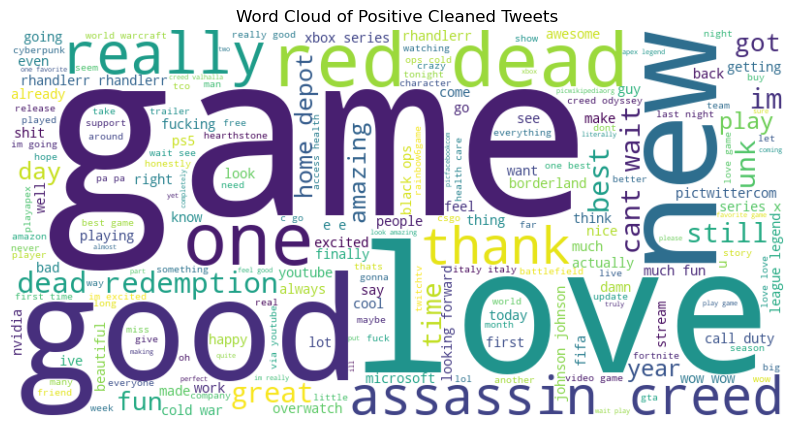

In [139]:
from wordcloud import WordCloud

# Join all the cleaned tweets into a single string
text = ' '.join(df[df.Sentiment == 'Positive'].Cleaned_Tweet)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Cleaned Tweets')
plt.show()


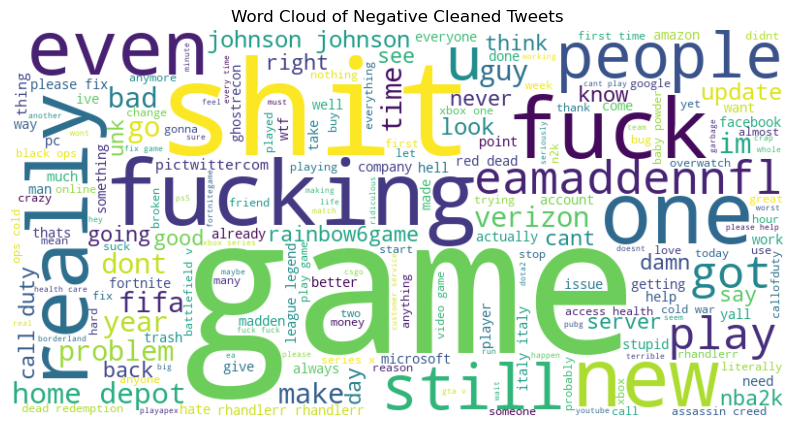

In [140]:
# Join all the cleaned tweets into a single string
text = ' '.join(df[df.Sentiment == 'Negative'].Cleaned_Tweet)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Cleaned Tweets')
plt.show()


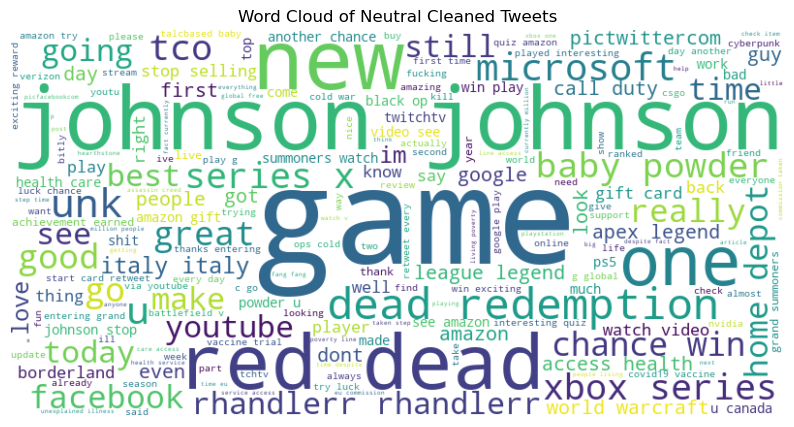

In [141]:
# Join all the cleaned tweets into a single string
text = ' '.join(df[df.Sentiment == 'Neutral'].Cleaned_Tweet)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Cleaned Tweets')
plt.show()


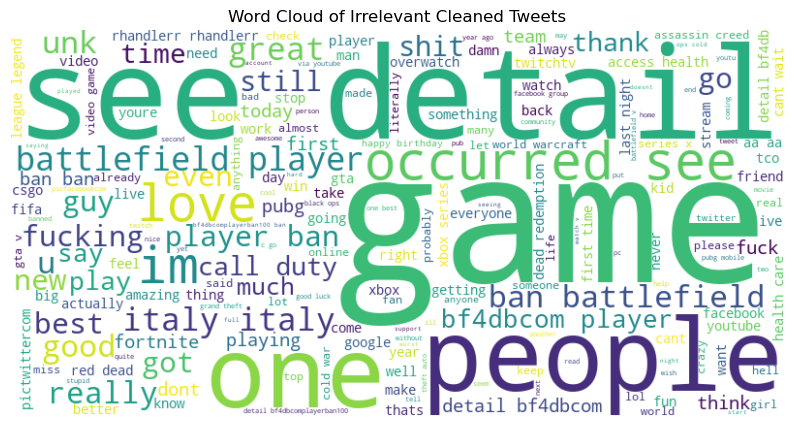

In [142]:
# Join all the cleaned tweets into a single string
text = ' '.join(df[df.Sentiment == 'Irrelevant'].Cleaned_Tweet)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Irrelevant Cleaned Tweets')
plt.show()


In [143]:
df.head()

,ID,Game,Sentiment,Tweet,word count,Cleaned_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,im getting borderland 2 murder


In [144]:
df['target'] = df['Sentiment'].map({'Positive':1,'Negative':2,'Neutral':3,'Irrelevant':4})

In [145]:
df

,ID,Game,Sentiment,Tweet,word count,Cleaned_Tweet,target
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,im getting borderland murder,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,coming border kill,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,im getting borderland kill,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,im coming borderland murder,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,im getting borderland 2 murder,1
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,26,realized window partition mac like 6 year behi...,1
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,23,realized mac window partition 6 year behind nv...,1
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,25,realized window partition mac 6 year behind nv...,1
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,32,realized window partition mac like 6 year behi...,1


In [148]:
y = df['target'].values
x = df['Cleaned_Tweet'].values

In [154]:
validation_df = pd.read_csv('twitter_validation.csv', names = columns)

validation_df.head()

,ID,Game,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [155]:
validation_df.isna().sum()

ID           0
Game         0
Sentiment    0
Tweet        0
dtype: int64

In [156]:
validation_df.dropna(inplace=True)

In [157]:
validation_df['Cleaned_Tweet'] = validation_df['Tweet'].apply(lambda x: clean_text(x))

In [158]:
validation_df['target'] = validation_df['Sentiment'].map({'Positive':1,'Negative':2,'Neutral':3,'Irrelevant':4})

In [159]:
validation_df.head()

,ID,Game,Sentiment,Tweet,Cleaned_Tweet,target
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...,4
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...,3
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorly samsungus c...,2
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,2
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...,3


In [160]:
y_test = validation_df['target'].values
x_test = validation_df['Cleaned_Tweet'].values

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [150]:
x = tfidf_vectorizer.fit_transform(x)

In [161]:
x_test = tfidf_vectorizer.fit_transform(x_test)

In [162]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y)

LinearRegression()

In [163]:
from sklearn.metrics import mean_squared_error

y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.305910065529479


In [165]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(x, y)

GradientBoostingRegressor(random_state=42)

In [166]:
gb_y_pred = gradient_boosting.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Gradient Boosting Mean Squared Error: 1.1448999969807299


In [168]:
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')  
svm_model.fit(x, y)

SVR(kernel='linear')

In [169]:
svm_y_pred = svm_model.predict(x_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f"SVM Mean Squared Error: {svm_mse}")

SVM Mean Squared Error: 1.342210705113598


In [172]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)
print(f"Linear Regression R² Score: {r2}")
print(f"Gradient Boosting R² Score: {gb_r2}")
print(f"SVM R² Score: {svm_r2}")

Linear Regression R² Score: 1.305910065529479
Gradient Boosting R² Score: -0.016698396034378726
SVM R² Score: -0.19191499225074793


In [173]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
gb_rmse = mean_squared_error(y_test, gb_y_pred, squared=False)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)
print(f"Linear Regression RMSE: {rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"SVM RMSE: {svm_rmse}")

Linear Regression RMSE: 1.1427642213201632
Gradient Boosting RMSE: 1.0699999985891262
SVM RMSE: 1.1585381759413877


In [174]:
mae = mean_absolute_error(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
print(f"Linear Regression MAE: {mae}")
print(f"Gradient Boosting MAE: {gb_rmse}")
print(f"SVM MAE: {svm_mae}")

Linear Regression MAE: 0.9670740355427133
Gradient Boosting MAE: 1.0699999985891262
SVM MAE: 0.967951309891742
